# split

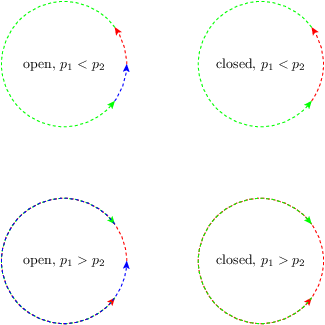

In [1]:
import math
from pyx import *

circle = path.circle(0, 0, 5/math.pi)
opencircle, = circle.split(circle.begin())

c = canvas.canvas()

def showsplit(x, y, path, splitpoints, description):
    c.text(x, y, description, [text.halign.center, text.vshift.mathaxis])
    segments = path.transformed(trafo.translate(x, y)).split(splitpoints)
    print("path sement lengths for ``%s'':" % description)
    for segment, segment_color in zip(segments, [color.rgb.red, color.rgb.green, color.rgb.blue]):
        print("  %s" % segment.arclen())
        c.stroke(segment, [deco.earrow.normal, style.linestyle.dashed, segment_color])
    print()

showsplit(0, 0, opencircle, [opencircle.begin()+1, opencircle.end()-1], "open, $p_1 < p_2$")
showsplit(0, -5, opencircle, [opencircle.end()-1, opencircle.begin()+1], "open, $p_1 > p_2$")

showsplit(5, 0, circle, [circle.begin()+1, circle.end()-1], "closed, $p_1 < p_2$")
showsplit(5, -5, circle, [circle.end()-1, circle.begin()+1], "closed, $p_1 > p_2$")

c

Splitting of paths at several points, which are not ordered along the path,
might look a little stange at first. This gallery example will show you the
basic procedure PyX applies for that case. 

First of all, the order of the points is always preserved. The first segment
returned by the split method ends at the first splitting point, the second
segment goes from the first splitting point to the second splitting point (and
maybe this path element will thus have a different orientation than the
original path). Finally, for an open path the last item in the list of returned
segments will go from the last splitting point to the end of the path. However,
for a closed path this last path item is prepended to the first segment
returned by the split method. Thus for a closed path the first segment will
always go from the last to the first splitting point.

In the given example four circles are shown, which have a circumference of 10
cm each and a counter clockwise orientation. We always use two split points,
one is located 1 cm after the beginning of the path, the other is located 1 cm
before the end of the path. On the left side the circle is open on the right
point of the horizontal line going through the center of the circle. The three
segments are stroked in red, green, and blue. Note that on the bottom, where
the point close to the end of the path is used as the first splitting point,
the second segment (shown in green, best visible by the arrow) has a reverse
orientation. Still, the sum of all segments is the full path, when taking into
account the reverse orientation of the second segment. Please also note the
lengths of the segment shown in the output of the script.

Now the result on the right side should not be surprising anymore. The red
segment is given by joining the blue and the red segment from the version shown
on the left. However, this means that the red arrow in the lower right is
longer than one loop of the path, in fact it is 18 cm long, almost two times
the circumference.
